In [1]:
"""
Задача: y' = Exp(x) * Cos(2y^2), 
        y(0) = 1 Промежуток - [a, b] = [0, 1] 
"""

"\nЗадача: y' = Exp(x) * Cos(2y^2), \n        y(0) = 1 Промежуток - [a, b] = [0, 1] \n"

In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
def mean_func(x, y):
    return np.exp(x) * np.cos(2 * y ** 2)


In [4]:
def modified_euler(x, y, n_steps: int, h_loss: float):
    for i in range(n_steps - 1):
        pre_counted = y[i] + h_loss / 2 * mean_func(x[i], y[i])
        y[i + 1] = y[i] + h_loss * mean_func(x[i] + h_loss / 2, pre_counted)
    return y

In [5]:
def euler_recount(x, y, n_steps: int, h_loss: float):
    for i in range(n_steps - 1):
        pre_counted = y[i] + h_loss * mean_func(x[i], y[i])
        y[i + 1] = y[i] + h_loss / 2 * (mean_func(x[i], y[i]) + mean_func(x[i] + h_loss, pre_counted))
    return y

In [6]:
def euler_right_diff(x, y, n_steps: int, h_loss: float):
    for i in range(n_steps - 1):
        y[i + 1] = y[i] + h_loss * mean_func(x[i], y[i])
    return y

In [18]:
def euler_left_diff(x, y, n_steps: int, h_loss: float):
    for i in range(0, n_steps):
        y[i] = y[i - 1] + h_loss * mean_func(x[i-1], y[i-1])
    return y

In [19]:
def euler_central_diff(x, y, n_steps: int, h_loss: float):
    y[1] = y[0] + h_loss * mean_func(x[0], y[0])
    for i in range(1, n_steps - 1):
        y[i + 1] = y[i - 1] + 2 * h_loss * mean_func(x[i-1], y[i-1])
    return y

In [20]:
def init_render(foo, first_bound: float, second_bound: float, x_zero: int, y_zero: int, h_losses: [float], title: str):
    for h_loss in h_losses:
        n_steps = int((second_bound - first_bound) / h_loss)

        x_set = np.linspace(first_bound, second_bound, num=n_steps)
        x_set[0] = x_zero

        y_set = x_set.copy()
        y_set[0] = y_zero

        y_dif_set = foo(x_set, y_set, n_steps, h_loss)
        x_set = np.linspace(first_bound, second_bound, num=n_steps)

        plt.plot(x_set, y_dif_set, label=f'Accuracy: {h_loss}')
        plt.legend()
        plt.title(title)

    plt.show()

In [21]:
# bounds of computing
a = 0.0
b = 1.0

In [22]:
# entry conditions
x_0 = 0
y_0 = 1

In [29]:
# maximum losses of accuracy
h_list = [0.01, 0.005, 0.001]

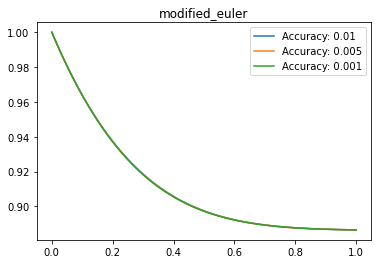

In [30]:
init_render(modified_euler, a, b, x_0, y_0, h_list, 'modified_euler')

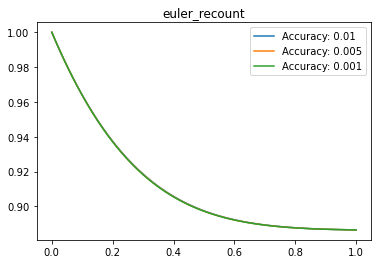

In [31]:
init_render(euler_recount, a, b, x_0, y_0, h_list, 'euler_recount')

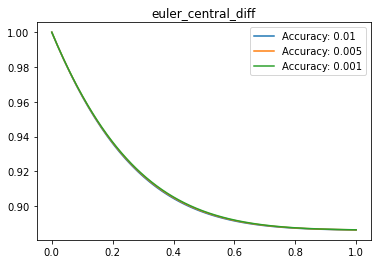

In [32]:
init_render(euler_central_diff, a, b, x_0, y_0, h_list, 'euler_central_diff')

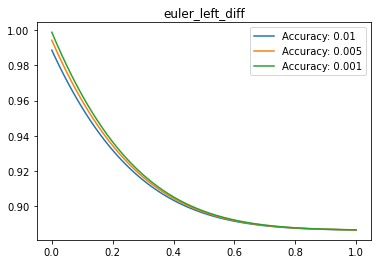

In [33]:
init_render(euler_left_diff, a, b, x_0, y_0, h_list, 'euler_left_diff')

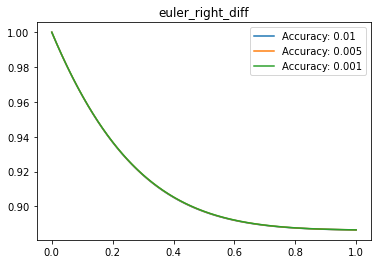

In [34]:
init_render(euler_right_diff, a, b, x_0, y_0, h_list, 'euler_right_diff')